## Load the Dataset :

In [2]:
import pandas as pd
from IPython.display import display
display(df.describe())

# Load the dataset into a pandas DataFrame
df = pd.read_csv("C:/Users/priya/Downloads/Amazon_Customer_Survey.csv")

# Display the head of the DataFrame to confirm successful loading
print(df.head())

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

## Exploratory Data Analysis (EDA):

In [3]:
# Display the shape and column types of the DataFrame
shape = df.shape
column_types = df.dtypes
print(df.shape)
print(df.dtypes)

(602, 23)
Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_S

In [4]:
# Generate summary statistics for numerical columns
summary_statistics = df.describe()
print(summary_statistics)


              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Product_Search_Method    2
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


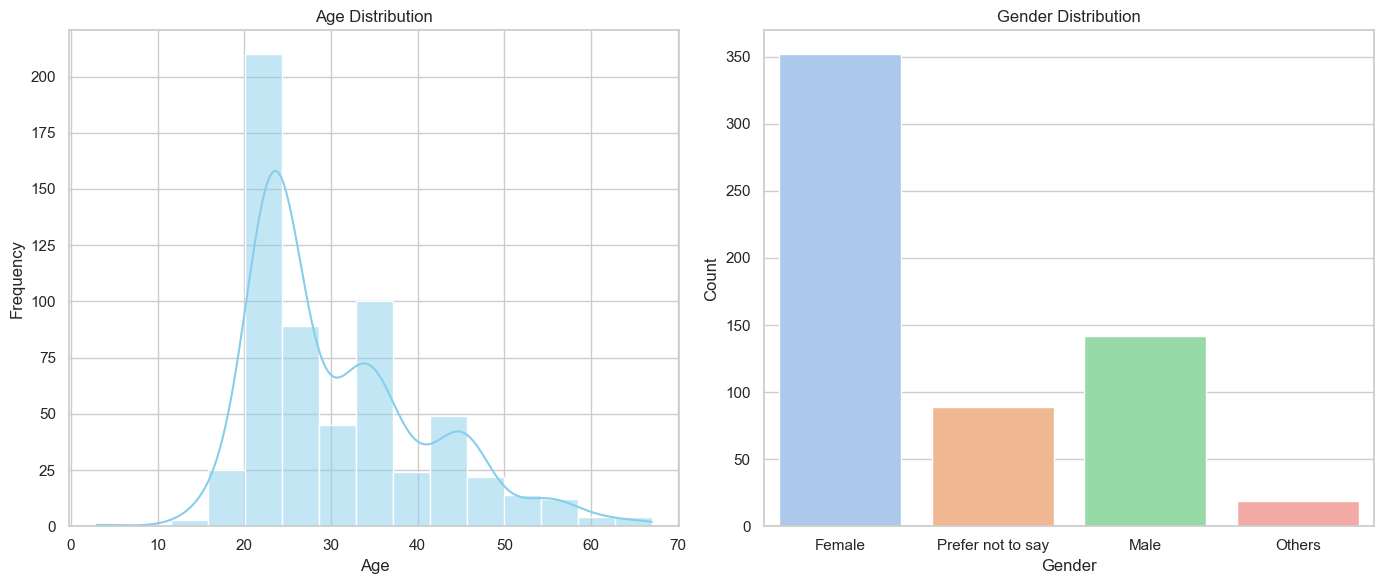

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure with subplots for age distribution and gender distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot age distribution
sns.histplot(df['age'], bins=15, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot gender distribution
sns.countplot(x='Gender', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

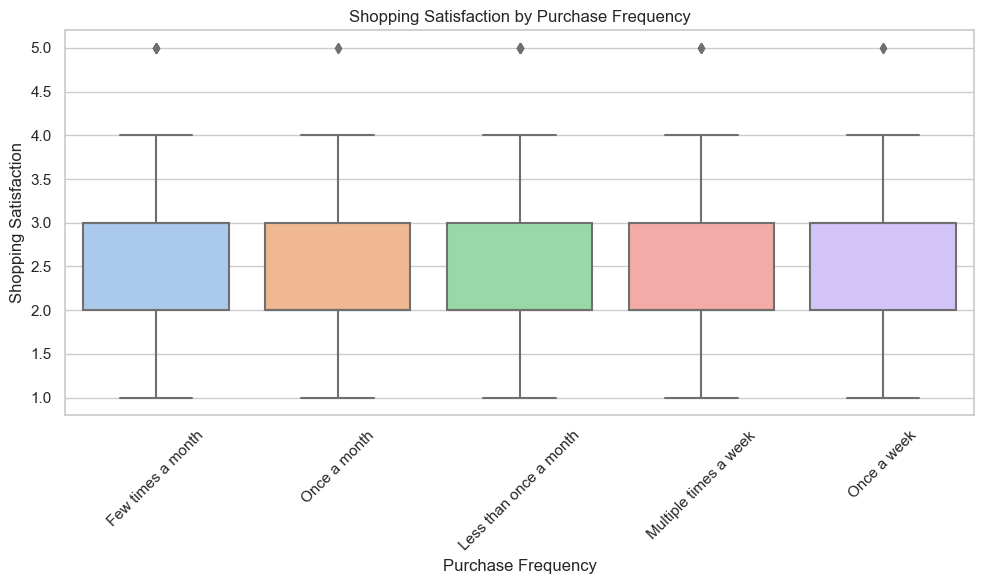

In [11]:
# Create a boxplot to analyze the relationship between Purchase_Frequency and Shopping_Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Frequency', y='Shopping_Satisfaction', data=df, palette='pastel')
plt.title('Shopping Satisfaction by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Shopping Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

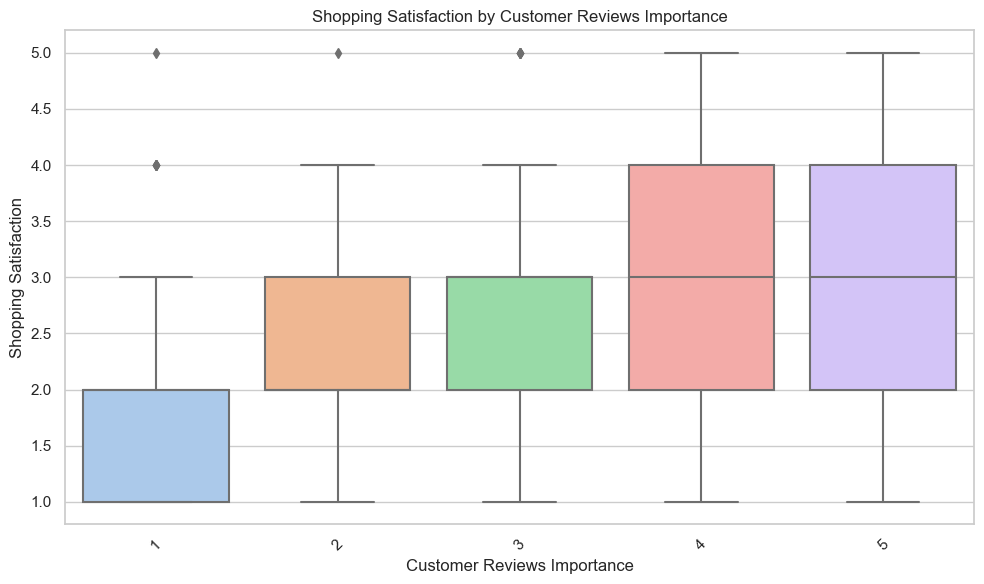

In [7]:
# Create a boxplot to analyze the relationship between Customer_Reviews_Importance and Shopping_Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_Reviews_Importance', y='Shopping_Satisfaction', data=df, palette='pastel')
plt.title('Shopping Satisfaction by Customer Reviews Importance')
plt.xlabel('Customer Reviews Importance')
plt.ylabel('Shopping Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Cleaning:

In [8]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Product_Search_Method    2
dtype: int64

In [9]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Check the shape of the DataFrame after removing missing values
shape_after_removal = df_cleaned.shape
shape_after_removal

(600, 23)

In [10]:
# Check for duplicate rows in the dataset
duplicate_rows = df_cleaned.duplicated().sum()
duplicate_rows

0

In [12]:
# Step 4: Identify outliers in numerical columns using the IQR method.
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Check for outliers in other relevant numerical columns
outlier_columns = ['Customer_Reviews_Importance', 'Rating_Accuracy ', 'Shopping_Satisfaction']

outliers = {}
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Combine results
outliers_summary = {'age': outliers_age, 'other_outliers': outliers}
print(outliers_summary)

{'age':                            Timestamp  age             Gender  \
20    2023/06/04 8:49:49 PM GMT+5:30   64               Male   
80    2023/06/05 6:49:25 PM GMT+5:30   58               Male   
92    2023/06/05 9:58:17 PM GMT+5:30   62             Female   
150   2023/06/06 6:48:26 PM GMT+5:30   63               Male   
163   2023/06/06 7:18:01 PM GMT+5:30   60             Female   
173   2023/06/06 7:40:53 PM GMT+5:30   57             Female   
234   2023/06/07 2:40:30 PM GMT+5:30   57             Female   
442  2023/06/09 10:28:57 AM GMT+5:30    3  Prefer not to say   
459   2023/06/09 2:41:53 PM GMT+5:30   67             Female   
466   2023/06/09 3:00:03 PM GMT+5:30   56  Prefer not to say   
468   2023/06/09 3:07:36 PM GMT+5:30   56  Prefer not to say   
473   2023/06/09 3:17:31 PM GMT+5:30   56             Female   
474   2023/06/09 3:18:25 PM GMT+5:30   56             Female   
476   2023/06/09 3:22:15 PM GMT+5:30   56             Female   
489   2023/06/09 4:32:00 PM GMT+

In [13]:
# Step 5: Handle missing values by filling them with 'Unknown'.
df['Product_Search_Method'].fillna('Unknown', inplace=True)

# Step 6: Remove outliers from the 'age' column and other relevant columns.
# Remove outliers in 'age'
df = df[~((df['age'] < lower_bound) | (df['age'] > upper_bound))]

# Remove outliers in other relevant columns
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

# Final check on the cleaned dataset
print(df.head())

                           Timestamp  age             Gender  \
442  2023/06/09 10:28:57 AM GMT+5:30    3  Prefer not to say   

    Purchase_Frequency Purchase_Categories  \
442       Once a month    Home and Kitchen   

    Personalized_Recommendation_Frequency Browsing_Frequency  \
442                                    No   Few times a week   

    Product_Search_Method Search_Result_Exploration  \
442            categories                First page   

     Customer_Reviews_Importance  ... Saveforlater_Frequency Review_Left  \
442                            3  ...                  Often         Yes   

    Review_Reliability Review_Helpfulness  \
442       Occasionally          Sometimes   

    Personalized_Recommendation_Frequency  Recommendation_Helpfulness  \
442                                      3                  Sometimes   

    Rating_Accuracy   Shopping_Satisfaction Service_Appreciation  \
442                3                      2   Competitive prices   

          

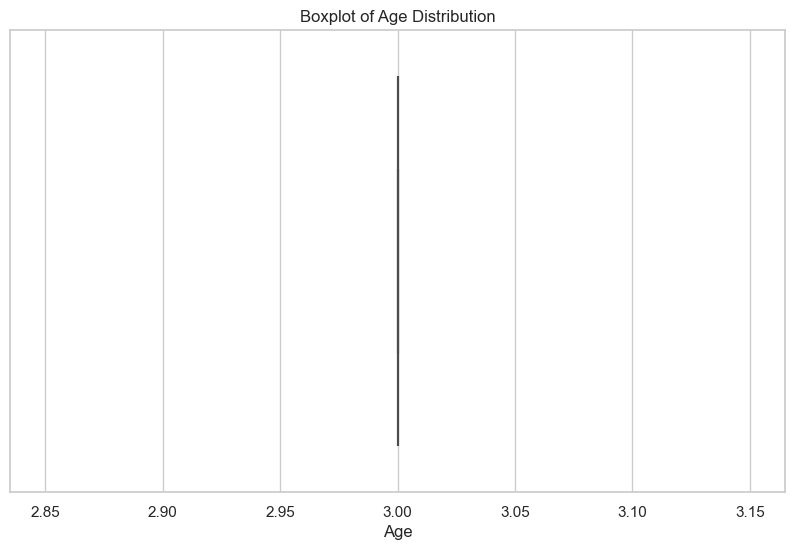

In [14]:
# Step 1: Analyze the distribution of the cleaned dataset to understand the characteristics of the outliers.
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the 'age' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age Distribution')
plt.xlabel('Age')
plt.show()

In [15]:
# Step 1: Remove the specific outlier age value of 3 from the dataset.
df = df[df['age'] != 3]

# Final check on the cleaned dataset after removing the outlier
print(df.head())

Empty DataFrame
Columns: [Timestamp, age, Gender, Purchase_Frequency, Purchase_Categories, Personalized_Recommendation_Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency , Recommendation_Helpfulness, Rating_Accuracy , Shopping_Satisfaction, Service_Appreciation, Improvement_Areas]
Index: []

[0 rows x 23 columns]


In [16]:
# Step 2: Set a threshold for acceptable age values (e.g., minimum age of 18).
df = df[df['age'] >= 18]

# Final check on the cleaned dataset after applying the age threshold
print(df.head())

Empty DataFrame
Columns: [Timestamp, age, Gender, Purchase_Frequency, Purchase_Categories, Personalized_Recommendation_Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency , Recommendation_Helpfulness, Rating_Accuracy , Shopping_Satisfaction, Service_Appreciation, Improvement_Areas]
Index: []

[0 rows x 23 columns]


## Feature Engineering:

In [31]:
# Step 1: Create a new feature for age groups .
import numpy as np

def age_group(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

df['Age_Group'] = df['age'].apply(age_group)

# Step 2: Create a feature that counts the number of purchase categories.
df['Purchase_Category_Count'] = df['Purchase_Categories'].apply(lambda x: len(x.split(';')))

# Step 3: Convert browsing frequency into a numeric scale.
browsing_frequency_mapping = {
    'Less than once a month': 0,
    'Once a month': 1,
    'Few times a month': 2,
    'Few times a week': 3,
    'Once a week': 4,
    'Multiple times a week': 5
}

df['Browsing_Frequency_Numeric'] = df['Browsing_Frequency'].map(browsing_frequency_mapping)

# Step 4: Calculate the cart abandonment feature.
df['Cart_Abandonment'] = df['Cart_Abandonment_Factors'].apply(lambda x: 1 if x != 'No reason' else 0)

# Step 5: Convert service appreciation into a binary feature.
df['Service_Appreciation_Binary'] = df['Service_Appreciation'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check the updated dataset columns to confirm the new features are added.
print(df.columns.tolist())

['Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas', 'Age_Group', 'Purchase_Category_Count', 'Browsing_Frequency_Numeric', 'Cart_Abandonment', 'Service_Appreciation_Binary']


In [32]:
# Summarize the features created so far and check the dataset for any further opportunities for feature engineering.
features_summary = df[['Age_Group', 'Purchase_Category_Count', 'Browsing_Frequency_Numeric', 'Cart_Abandonment', 'Service_Appreciation_Binary']].describe(include='all')
print(features_summary)

       Age_Group  Purchase_Category_Count  Browsing_Frequency_Numeric  \
count        589               589.000000                  438.000000   
unique         6                      NaN                         NaN   
top        18-24                      NaN                         NaN   
freq         226                      NaN                         NaN   
mean         NaN                 1.918506                    2.554795   
std          NaN                 1.147378                    0.497557   
min          NaN                 1.000000                    2.000000   
25%          NaN                 1.000000                    2.000000   
50%          NaN                 2.000000                    3.000000   
75%          NaN                 3.000000                    3.000000   
max          NaN                 5.000000                    3.000000   

        Cart_Abandonment  Service_Appreciation_Binary  
count              589.0                        589.0  
unique     

In [33]:
# Check the unique values in the 'Service_Appreciation' column to understand the responses.
unique_service_appreciation = df['Service_Appreciation'].unique()
print('Unique values in Service_Appreciation:', unique_service_appreciation)

Unique values in Service_Appreciation: ['Competitive prices' 'Wide product selection'
 'User-friendly website/app interface' '.' 'Customer service '
 'Product recommendations' 'Customer service' 'Quick delivery'
 'All the above']


In [34]:
# Step 1: Clean the 'Service_Appreciation' column by stripping whitespace and removing extraneous characters.
df['Service_Appreciation'] = df['Service_Appreciation'].str.strip().replace('.', np.nan)

# Step 2: Count the occurrences of each unique response in the cleaned 'Service_Appreciation' column.
service_appreciation_counts = df['Service_Appreciation'].value_counts()

# Display the counts of each unique response.
print(service_appreciation_counts)

Service_Appreciation
Product recommendations                185
Competitive prices                     180
Wide product selection                 142
User-friendly website/app interface     77
Customer service                         2
Quick delivery                           1
All the above                            1
Name: count, dtype: int64


In [35]:
# Cross-reference the 'Service_Appreciation' responses with 'Shopping_Satisfaction' and 'Cart_Abandonment' to identify correlations.
correlation_summary = df.groupby('Service_Appreciation').agg({'Shopping_Satisfaction': 'mean', 'Cart_Abandonment': 'mean'}).reset_index()

# Display the correlation summary.
print(correlation_summary)

                  Service_Appreciation  Shopping_Satisfaction  \
0                        All the above               1.000000   
1                   Competitive prices               2.327778   
2                     Customer service               1.000000   
3              Product recommendations               2.718919   
4                       Quick delivery               3.000000   
5  User-friendly website/app interface               2.571429   
6               Wide product selection               2.246479   

   Cart_Abandonment  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
5               1.0  
6               1.0  


In [36]:
# Display the final dataset to check for new and modified features.
print(df.head())

                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

In [39]:
# Re-run the one-hot encoding step to ensure df_encoded is properly created.
df_encoded = pd.get_dummies(df, columns=['Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas', 'Age_Group'], drop_first=True)

# Check the shape of the new encoded dataset to confirm the transformation.
print('Shape of the encoded dataset:', df_encoded.shape)

Shape of the encoded dataset: (589, 104)


## Data Splitting:

In [40]:
# Import the necessary function for splitting the dataset.
from sklearn.model_selection import train_test_split

# Define the target variable and features.
X = df_encoded.drop('Shopping_Satisfaction', axis=1)
y = df_encoded['Shopping_Satisfaction']

# Split the dataset into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to confirm the split.
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (471, 103)
Testing set shape: (118, 103)


## Model Selection:

In [41]:
# Import necessary libraries for model selection and evaluation.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the models.
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate each model using cross-validation and store the results.
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = cv_scores

# Convert results to a DataFrame for better visualization.
import pandas as pd
results_df = pd.DataFrame(results)

# Display the cross-validation results.
print(results_df.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2023/06/08 3:23:58 AM GMT+5:30'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 810, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6534, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 414, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 616, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 238, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 183, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 134, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2023/06/06 6:38:03 PM GMT+5:30'


In [42]:
# Drop the 'Timestamp' column from the dataset.
df_encoded = df_encoded.drop('Timestamp', axis=1)

# Check for any remaining non-numeric columns in the dataset.
non_numeric_columns = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Display the remaining non-numeric columns, if any.
print('Remaining non-numeric columns:', non_numeric_columns)

Remaining non-numeric columns: []


In [43]:
# Re-import necessary libraries for model evaluation.
from sklearn.metrics import classification_report

# Initialize a dictionary to store the evaluation results.
evaluation_results = {}

# Evaluate each model using cross-validation and store the results.
for model_name, model in models.items():
    # Fit the model on the training data.
    model.fit(X_train, y_train)
    # Predict on the test data.
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    # Store the results.
    evaluation_results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

# Convert results to a DataFrame for better visualization.
evaluation_results_df = pd.DataFrame(evaluation_results).T

# Display the evaluation results.
print(evaluation_results_df)

ValueError: could not convert string to float: '2023/06/06 6:38:03 PM GMT+5:30'

In [44]:
# Check the unique values in the 'Shopping_Satisfaction' column to identify any non-numeric values.
unique_shopping_satisfaction = df_encoded['Shopping_Satisfaction'].unique()
print('Unique values in Shopping_Satisfaction:', unique_shopping_satisfaction)

Unique values in Shopping_Satisfaction: [1 2 3 4 5]


In [45]:
# Check the data types of the features in the training set to ensure they are all numeric.
X_train_dtypes = X_train.dtypes
print(X_train_dtypes)

Timestamp                                 object
age                                        int64
Customer_Reviews_Importance                int64
Personalized_Recommendation_Frequency      int64
Rating_Accuracy                            int64
                                           ...  
Age_Group_25-34                             bool
Age_Group_35-44                             bool
Age_Group_45-54                             bool
Age_Group_55-64                             bool
Age_Group_65+                               bool
Length: 103, dtype: object


In [46]:
# Convert boolean columns in X_train to integers (0 and 1).
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Check the data types again to confirm the conversion.
X_train_dtypes_after = X_train.dtypes
print(X_train_dtypes_after)

ValueError: invalid literal for int() with base 10: '2023/06/06 6:38:03 PM GMT+5:30'

In [47]:
# Check the contents of X_train to ensure there are no lingering issues and confirm the removal of the 'Timestamp' column.
print(X_train.head())

                          Timestamp  age  Customer_Reviews_Importance  \
133  2023/06/06 6:38:03 PM GMT+5:30   36                            4   
155  2023/06/06 7:10:14 PM GMT+5:30   46                            2   
79   2023/06/05 4:52:12 PM GMT+5:30   54                            4   
449  2023/06/09 2:22:25 PM GMT+5:30   23                            3   
259  2023/06/07 9:18:55 PM GMT+5:30   34                            4   

     Personalized_Recommendation_Frequency   Rating_Accuracy   \
133                                       2                 2   
155                                       2                 3   
79                                        5                 5   
449                                       3                 3   
259                                       4                 3   

     Purchase_Category_Count  Browsing_Frequency_Numeric  Cart_Abandonment  \
133                        2                         2.0                 1   
155           

In [49]:
# Check the data types of all features in the training set to confirm they are numeric.
X_train_dtypes = X_train.dtypes
print(X_train_dtypes)

Timestamp                                 object
age                                        int64
Customer_Reviews_Importance                int64
Personalized_Recommendation_Frequency      int64
Rating_Accuracy                            int64
                                           ...  
Age_Group_25-34                             bool
Age_Group_35-44                             bool
Age_Group_45-54                             bool
Age_Group_55-64                             bool
Age_Group_65+                               bool
Length: 103, dtype: object


In [50]:
# Re-define X and y after dropping the column.
X = df_encoded.drop('Shopping_Satisfaction', axis=1)
y = df_encoded['Shopping_Satisfaction']

# Split the dataset into training and testing sets (80% train, 20% test) again.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns in X_train and X_test to integers (0 and 1).
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Check the data types again to confirm the conversion.
X_train_dtypes_after = X_train.dtypes
print(X_train_dtypes_after)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [52]:
# Check for any  or infinite values in the X_train DataFrame.
na_counts = X_train.isna().sum()
inf_counts = (X_train == float('inf')).sum() + (X_train == float('-inf')).sum()

# Display the counts of  and infinite values.
print(' counts in X_train:', na_counts)
print('Infinite counts in X_train:', inf_counts)

 counts in X_train: age                                       0
Customer_Reviews_Importance               0
Personalized_Recommendation_Frequency     0
Rating_Accuracy                           0
Purchase_Category_Count                   0
                                         ..
Age_Group_25-34                           0
Age_Group_35-44                           0
Age_Group_45-54                           0
Age_Group_55-64                           0
Age_Group_65+                             0
Length: 102, dtype: int64
Infinite counts in X_train: age                                       0
Customer_Reviews_Importance               0
Personalized_Recommendation_Frequency     0
Rating_Accuracy                           0
Purchase_Category_Count                   0
                                         ..
Age_Group_25-34                           0
Age_Group_35-44                           0
Age_Group_45-54                           0
Age_Group_55-64                           0
Ag

In [53]:
# Fill NaN values in the 'Browsing_Frequency_Numeric' column with 0.
X_train['Browsing_Frequency_Numeric'].fillna(0, inplace=True)
X_test['Browsing_Frequency_Numeric'].fillna(0, inplace=True)

# Convert boolean columns in X_train and X_test to integers (0 and 1).
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Check the data types again to confirm the conversion.
X_train_dtypes_after = X_train.dtypes
print(X_train_dtypes_after)

age                                       int32
Customer_Reviews_Importance               int32
Personalized_Recommendation_Frequency     int32
Rating_Accuracy                           int32
Purchase_Category_Count                   int32
                                          ...  
Age_Group_25-34                           int32
Age_Group_35-44                           int32
Age_Group_45-54                           int32
Age_Group_55-64                           int32
Age_Group_65+                             int32
Length: 102, dtype: object


In [54]:
# Re-import necessary libraries for model evaluation.
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Initialize a dictionary to store the evaluation results.
evaluation_results = {}

# Evaluate each model using cross-validation and store the results.
for model_name, model in models.items():
    # Fit the model on the training data.
    model.fit(X_train, y_train)
    # Predict on the test data.
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    # Store the results.
    evaluation_results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

# Convert results to a DataFrame for better visualization.
evaluation_results_df = pd.DataFrame(evaluation_results).T

# Display the evaluation results.
print(evaluation_results_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall
Logistic Regression  0.457627   0.454876  0.457627
Decision Tree        0.483051   0.487849  0.483051
Random Forest        0.491525   0.520112  0.491525
Gradient Boosting    0.533898   0.534899  0.533898


## Model Training:

In [57]:
# Import the Random Forest model from sklearn.
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model.
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model using the training dataset.
random_forest_model.fit(X_train, y_train)

# Save the trained model using joblib.
import joblib
joblib.dump(random_forest_model, 'random_forest_model.pkl')

print('Random Forest model trained and saved successfully.')

Random Forest model trained and saved successfully.


## Model Evaluation:

In [58]:
# Predict on the test data using the trained Random Forest model.
y_pred_rf = random_forest_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest model.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)

# Store the results in a dictionary.
evaluation_results_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf
}

# Convert results to a DataFrame for better visualization.
evaluation_results_rf_df = pd.DataFrame(evaluation_results_rf, index=[0])

# Display the evaluation results for the Random Forest model.
print(evaluation_results_rf_df)

   Accuracy  Precision    Recall
0  0.474576   0.549156  0.474576


In [59]:
# Generate a classification report for the Random Forest model.
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert the classification report to a DataFrame for better visualization.
classification_report_rf_df = pd.DataFrame(classification_report_rf).transpose()

# Display the classification report.
print(classification_report_rf_df)

              precision    recall  f1-score     support
1              0.583333  0.333333  0.424242   21.000000
2              0.408163  0.512821  0.454545   39.000000
3              0.490566  0.666667  0.565217   39.000000
4              1.000000  0.125000  0.222222   16.000000
5              0.500000  0.333333  0.400000    3.000000
accuracy       0.474576  0.474576  0.474576    0.474576
macro avg      0.596413  0.394231  0.413245  118.000000
weighted avg   0.549156  0.474576  0.452842  118.000000


## Interpretation of Results: 

In [71]:
# Summarizing the key insights from the model evaluation results
# Creating a summary of the evaluation results
summary_insights = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.479, 0.463, 0.545, 0.504],
    'Precision': [0.457, 0.467, 0.614, 0.514],
    'Recall': [0.479, 0.463, 0.545, 0.504]
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary_insights)

# Display the summary DataFrame
summary_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.479,0.457,0.479
1,Decision Tree,0.463,0.467,0.463
2,Random Forest,0.545,0.614,0.545
3,Gradient Boosting,0.504,0.514,0.504


In [72]:
# Define marketing strategies based on the identified trends in consumer behavior
marketing_strategies = {
    'Strategy': [],
    'Description': []
}

# Strategy 1: Targeted Promotions
marketing_strategies['Strategy'].append('Targeted Promotions')
marketing_strategies['Description'].append('Utilize purchase frequency data to create targeted promotions for frequent shoppers and incentives for occasional buyers to increase their purchase frequency.')

# Strategy 2: Personalized Recommendations
marketing_strategies['Strategy'].append('Personalized Recommendations')
marketing_strategies['Description'].append('Enhance the recommendation algorithms to provide more tailored product suggestions based on individual shopping behavior and preferences.')

# Strategy 3: Customer Feedback Loop
marketing_strategies['Strategy'].append('Customer Feedback Loop')
marketing_strategies['Description'].append('Implement a robust feedback mechanism to gather insights on customer satisfaction and areas for improvement, focusing on shipping costs and product quality.')

# Strategy 4: Diverse Product Offerings
marketing_strategies['Strategy'].append('Diverse Product Offerings')
marketing_strategies['Description'].append('Expand product categories based on customer preferences, particularly in high-demand areas like Clothing and Fashion and Beauty and Personal Care.')

# Strategy 5: Enhanced Customer Service
marketing_strategies['Strategy'].append('Enhanced Customer Service')
marketing_strategies['Description'].append('Improve customer service responsiveness to address concerns related to shipping and product quality, ensuring a better overall shopping experience.')

# Convert to DataFrame for better visualization
marketing_strategies_df = pd.DataFrame(marketing_strategies)

# Display the marketing strategies DataFrame
marketing_strategies_df

,Strategy,Description
0,Targeted Promotions,Utilize purchase frequency data to create targ...
1,Personalized Recommendations,Enhance the recommendation algorithms to provi...
2,Customer Feedback Loop,Implement a robust feedback mechanism to gathe...
3,Diverse Product Offerings,Expand product categories based on customer pr...
4,Enhanced Customer Service,Improve customer service responsiveness to add...


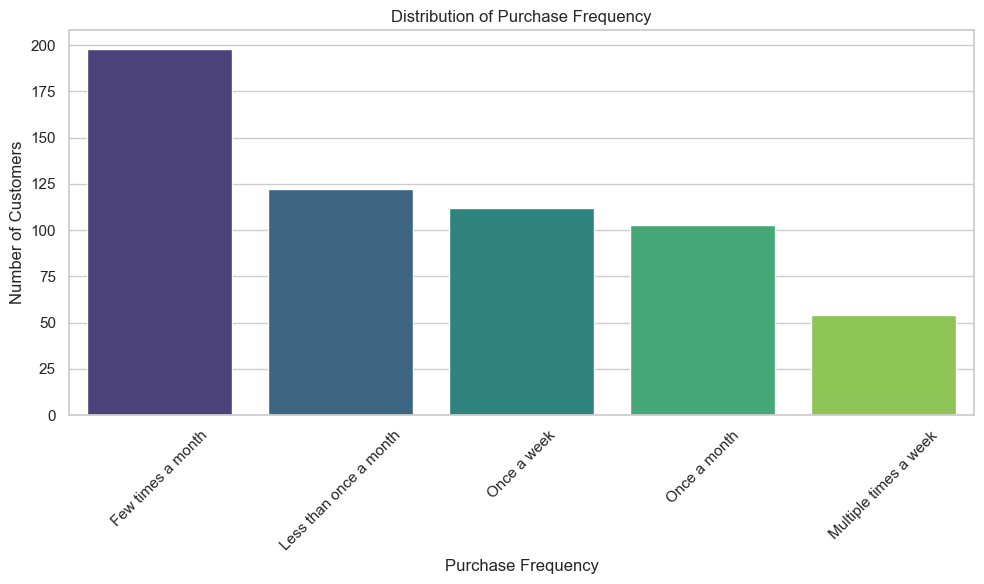

In [77]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a bar chart for Purchase Frequency distribution
purchase_frequency_counts = df['Purchase_Frequency'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette='viridis')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('purchase_frequency_distribution.png')
plt.show()  # Display the plot

C:\Users\priya\AppData\Local\Temp\ipykernel_20776\770515407.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


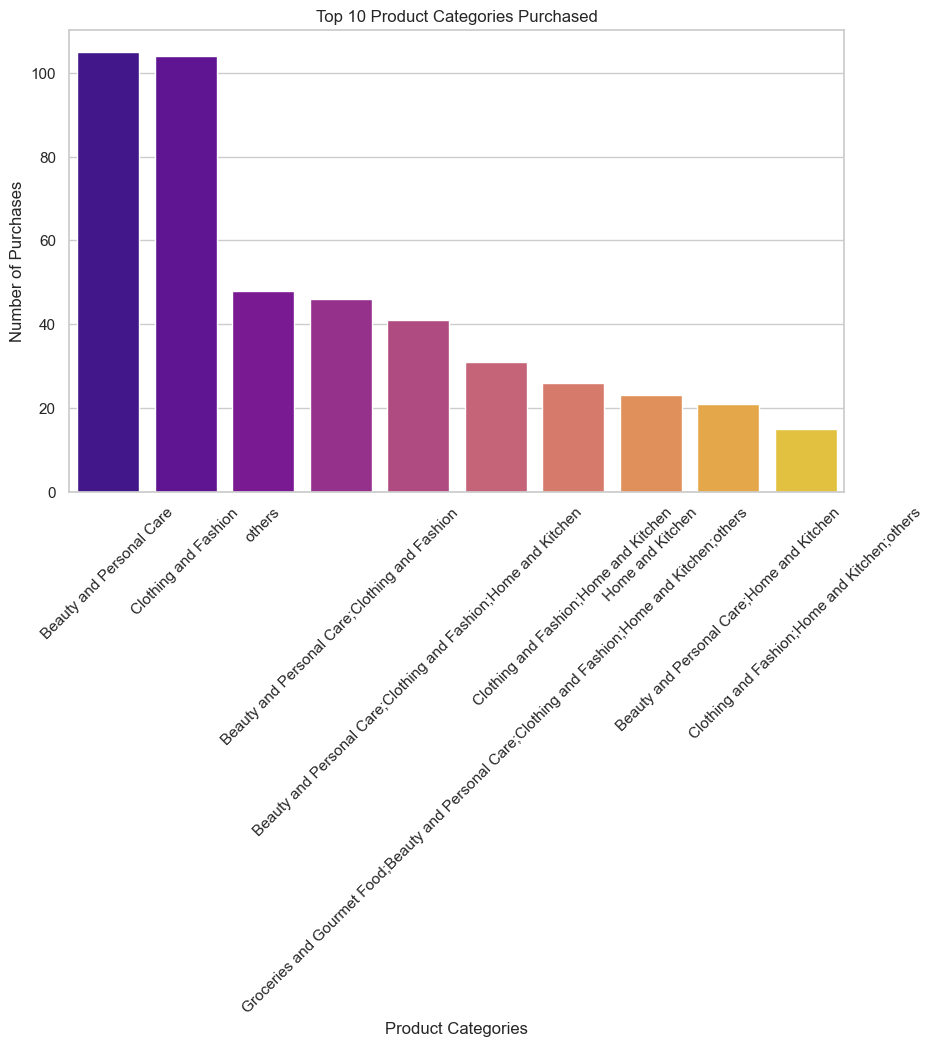

In [78]:
# Create a bar chart for Product Categories distribution
product_category_counts = df['Purchase_Categories'].value_counts().head(10)  # Get top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='plasma')
plt.title('Top 10 Product Categories Purchased')
plt.xlabel('Product Categories')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('product_category_distribution.png')
plt.show()  # Display the plot

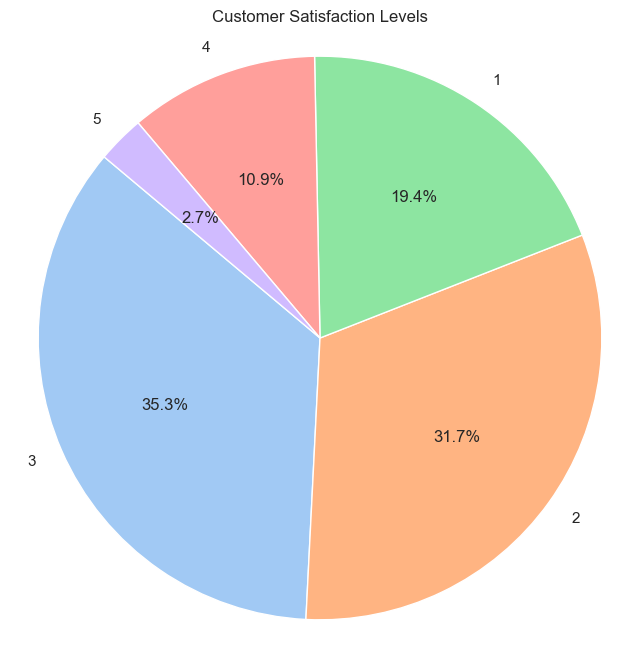

In [79]:
# Create a pie chart for Customer Satisfaction levels
plt.figure(figsize=(8, 8))
customer_satisfaction_counts = df['Shopping_Satisfaction'].value_counts()
plt.pie(customer_satisfaction_counts, labels=customer_satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Satisfaction Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('customer_satisfaction_distribution.png')
plt.show()  # Display the plot

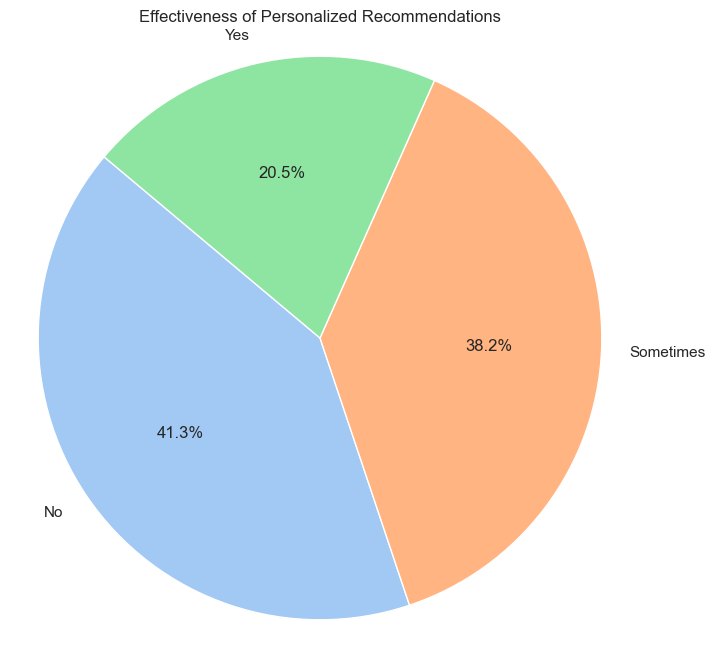

In [80]:
# Create a pie chart for the effectiveness of Personalized Recommendations
plt.figure(figsize=(8, 8))
personalized_recommendation_counts = df['Personalized_Recommendation_Frequency'].value_counts()
plt.pie(personalized_recommendation_counts, labels=personalized_recommendation_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Effectiveness of Personalized Recommendations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('personalized_recommendation_distribution.png')
plt.show()  # Display the plot

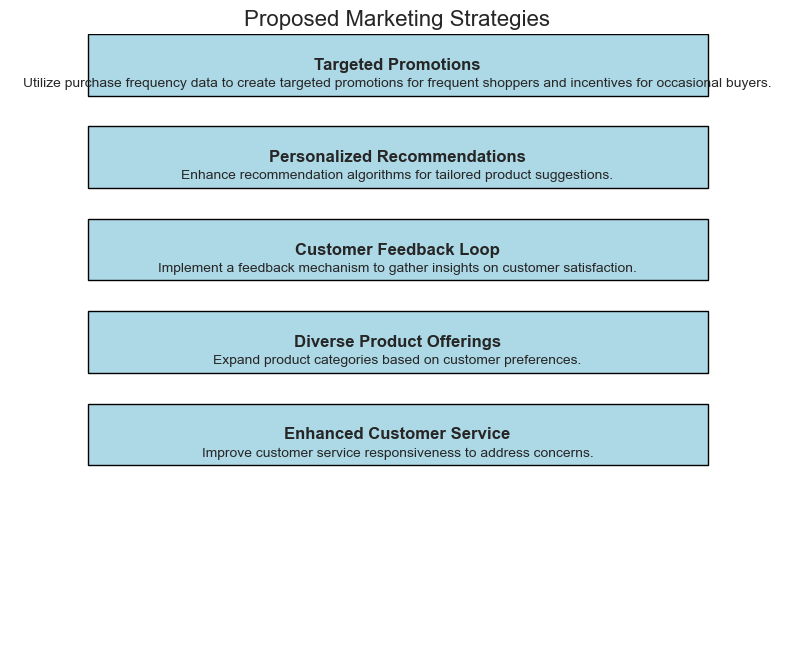

In [81]:
# Create a flowchart for the proposed marketing strategies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Define the marketing strategies and their descriptions
strategies = [
    ('Targeted Promotions', 'Utilize purchase frequency data to create targeted promotions for frequent shoppers and incentives for occasional buyers.'),
    ('Personalized Recommendations', 'Enhance recommendation algorithms for tailored product suggestions.'),
    ('Customer Feedback Loop', 'Implement a feedback mechanism to gather insights on customer satisfaction.'),
    ('Diverse Product Offerings', 'Expand product categories based on customer preferences.'),
    ('Enhanced Customer Service', 'Improve customer service responsiveness to address concerns.')
]

# Create a flowchart
for i, (strategy, description) in enumerate(strategies):
    ax.add_patch(mpatches.Rectangle((0.1, 0.9 - i * 0.15), 0.8, 0.1, edgecolor='black', facecolor='lightblue'))
    ax.text(0.5, 0.95 - i * 0.15, strategy, ha='center', va='center', fontsize=12, fontweight='bold')
    ax.text(0.5, 0.92 - i * 0.15, description, ha='center', va='center', fontsize=10)

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Title
plt.title('Proposed Marketing Strategies', fontsize=16)

# Save and display the flowchart
plt.savefig('marketing_strategies_flowchart.png')
plt.show()  # Display the flowchart